In [1]:
from cheaper.params import CheapERParams
from pipeline import cheaper_train
from pipeline import get_datasets

# get datasets
datasets = get_datasets()
beers_dataset = datasets[5]

In [2]:
# cheapER parameters' settings
params = CheapERParams()
params.epochs = 5
params.lr = 1e-5
params.lr_multiplier = 3
params.adaptive_ft = False

CheapER: training on dataset "beers"
CheapER: using params "sigma=3000,kappa=1200,epsilon=0.015,adaptive_ft=False,num_runs=1,normalize=True,sim_length=5,warmup=False,epochs=5,lr=1e-05,attribute_shuffle=False,identity=False,symmetry=False,models=['roberta-base'],slicing=[0.1, 0.33, 0.5, 1],compare=False,generated_only=True,approx=perceptron,balance=[0.5, 0.5],adjust_ds_size=True,batch_size=8,silent=True,deeper_trick=False,consistency=False,sim_edges=True,simple_slicing=True,use_model=noisy-student,teaching_iterations=3,lr_multiplier=3,data_noise=True,temperature=None,discard_old_data=False,use_scores=False,threshold=0"
Generating dataset
Parsing original dataset


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

------------- Teacher Training roberta-base ------------------
Training with 26 record pairs (10.0% GT)
***** Run training *****
***** Eval results after epoch -1 *****
eval_loss: 0.5940939982732137
f1_score: 0.0
report:               precision    recall  f1-score   support

           0       0.85      1.00      0.92        77
           1       0.00      0.00      0.00        14

    accuracy                           0.85        91
   macro avg       0.42      0.50      0.46        91
weighted avg       0.72      0.85      0.78        91

simple_accuracy: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        77
           1       0.00      0.00      0.00        14

    accuracy                           0.85        91
   macro avg       0.42      0.50      0.46        91
weighted avg       0.72      0.85      0.78        91

***** Eval results after epoch 0 *****
eval_loss: 0.5704408387343088
f1_score: 0.0
report

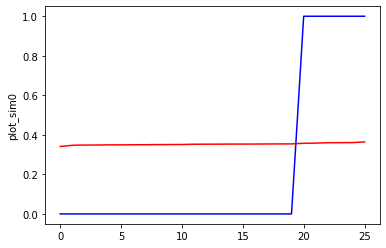

min_sim_Match 0.3572329max_sim_noMatch 0.35429254
!max_sim 0.37223289847373964
!min_sim 0.3392925417423248
--------------- Generating datasets --------------
min_cos_sim 0.30316953129541624
4345
3000
4345
3000
4345
LSH blocking started
903 pairs found


In [ ]:
results_df = cheaper_train(beers_dataset, params)
print(results_df)
